In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from scipy import stats as stats

# Zipf's distribution from stochastic process

<br>

### 0. Who is Zipf?

<br>

<img src = "https://upload.wikimedia.org/wikipedia/commons/c/c6/George_Kingsley_Zipf_1917.jpg" width=120px/>

<br>

* **George Kingsley Zipf** (/ˈzɪf/;[1] 1902–1950), was an American linguist and philologist who studied statistical occurrences in different languages.
<br>
<br>
(source: https://en.wikipedia.org/wiki/George_Kingsley_Zipf)

<br>

### 1. What is Zipf's distribution?

* **Zipf's law**:
<br>
<br>
*"Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table."* 
<br>
<br>
(source: https://en.wikipedia.org/wiki/Zipf%27s_law)

<br>

* **Zipf's distribution** (or statistic) is a discrete power law probability distribution which is well approximated (on a log-log scale) by a straight line with a slope around −1
<br>
<br>
(https://en.wikipedia.org/wiki/Zipf%27s_law)

<br>

### 2. Critique of Zipf's Law as an indicator of semantic structure

In Ryuji Suzuki, John R.Buck, Peter L.Tyack (2004) "The use of Zipf's law in animal communication analysis" authors state that:

*"(...) a stochastic process devoid of semantic or communicative content may still satisfy Zipf's law"* 

<br>

### 3. The goal of this notebook

This notebook is an attempt to replicate a production of Zipf distribution using stochastic process. It is based on dice example proposed by Suzuki et al. (2004) inspired by another analysis by Li (1992).

<br>

### 4. Let's go! 

* First, let's define a dice to roll:

In [2]:
dice = np.arange(1,7)                              # Define a dice

* Now we ready to dive deeper!

According to Suzuki et al. the procedure goes as follows:

*"We roll a fair cubic die repeatedly. We treat the number resulting from each roll as a letter, which we write down after each roll. We arbitrarily choose 6 to represent a space forming the break between successive words."*

In [3]:
utterance = np.zeros(10000)                        # Create an empty array

* Let's roll!

In [4]:
for i in range(10000):                             # Roll a dice 10000 times
    utterance[i] = np.random.choice(dice)          # ...and save the result

* Now, let's construct the utterance, and then clean it a bit

In [5]:
utterance = ''.join(map(str,map(int,utterance)))   # Join the letters to cnstrct the utterance

In [6]:
# Split the words (whitespace symbolized by '6')
utterance = utterance.split('6')

In [7]:
# Filter-out whitespaces
words = np.array(list(filter(lambda x: len(x) > 0, utterance)))

* Let's count occurences of unique words and their frequencies

In [8]:
# Count unique words and their frequencies
labels, values = np.unique(words, return_counts=True)

values = np.array(values) / len(words)

In [9]:
# Sort the values from the most frequent to the least frequent
indexes_sorted = np.argsort(values)[::-1]      

In [10]:
# Rearrange the data
labels = np.array(labels)[indexes_sorted]
values = np.array(values)[indexes_sorted]

# Produce indexes
indexes = np.arange(len(labels))

* Some more theory and we're ready to plot!

*"Zipf (1949) observed that, for many human languages, a plot of the frequency of words against the rank of occurrence on doubly logarithmic axes (log frequency versus log rank) is well approximated by a straight line with a slope around −1"* (Suzuki et al., 2005)

<br>

* As further proposed by Suzuki et al. (2005):

*"Our straight line fitting the rank–frequency data is in the form:*

<br> 
$$p(r) = cr^{\alpha}$$

*where (...):*
<br>

$$\alpha = -\frac{log6}{log5}$$

*and*

$$c = \frac{1}{\sum_{r=1}^{\infty}r^{-\frac{log6}{log5}}}$$

*(...)*

*In this expression, we see that α, the power of the rank, is −log 6/log 5, which is approximately −1.11. This α will be the slope when the data are plotted on doubly logarithmic axes"* (Suzuki et al., 2005)

<br>

* Let's recreate this!

In [11]:
# Produce theoretical line fit
line_x = np.arange(1,len(values))

alpha = (-np.log(6) / np.log(5))

line_y = (1 / sum(line_x**alpha)) * line_x**alpha

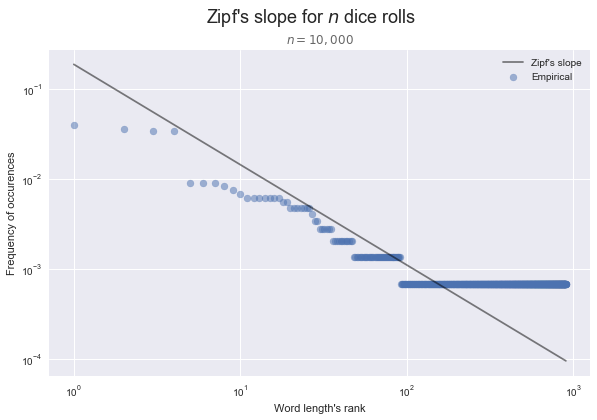

In [16]:
# Visualize
plt.figure(figsize=(9.7, 6))
plt.scatter(indexes, values, alpha=.5, label='Empirical')
plt.plot(line_x, line_y, color='black', alpha=.5, label="Zipf's slope")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Word length's rank")
plt.ylabel('Frequency of occurences')
plt.suptitle("Zipf's slope for $n$ dice rolls", fontsize='18')
plt.title("$n = 10,000$", alpha=.7)
plt.legend()
plt.show()

* So, what do you think? How does the plot look for you?

### 5. References

* Li, W. (1992). Random Texts Exhibit Zipfs-Law-Like Word Frequency Distribution. IEEE Transactions on Information Theory, 38(6), 1842–1845. https://doi.org/10.1109/18.165464

* Suzuki, R., Buck, J. R., & Tyack, P. L. (2005). The use of Zipf’s law in animal communication analysis. Animal Behaviour, 69(1), F9–F17. https://doi.org/10.1016/j.anbehav.2004.08.004

* Zipf, G. K. (1949). Human Behavior and the Principle of Least Effort. Addisson-Wesley Press, Cambridge, 6(3), 573.

* https://en.wikipedia.org/wiki/Zipf%27s_law

Another interesting perspective on Zipf's Law can be found here:

* McCowan, B., Doyle, L. R., Jenkins, J. M., & Hanser, S. F. (2005). The appropriate use of Zipf’s law in animal communication studies. Animal Behaviour, 69(1), F1–F7. https://doi.org/10.1016/j.anbehav.2004.09.002


### 6. Contact me

I'd love to hear your **comments**!

Feel free to contact me at: aleksander.molak (at) gmail.com

_____________

MIT License, Aleksander Molak, 2018 